In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

import pydotplus

from IPython.display import Image 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.dummy import DummyClassifier

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score, cross_validate

from imblearn.over_sampling import SMOTE, RandomOverSampler
from collections import Counter


In [2]:
df = pd.read_csv("df_clustering.csv", skipinitialspace=True)

In [3]:
df.head()

,word,length,arousal,valence,dominance,concreteness,familiarity,aoa,semsize,gender,polysemy
0,abattoir,8,4.200,2.864,4.333,5.455,2.382,6.760,4.652,5.391,0
1,abbey,5,3.125,5.781,4.667,5.906,3.324,5.177,5.121,3.303,0
2,abbreviate,10,3.273,5.250,5.235,3.286,5.121,5.543,2.667,3.971,0
3,abdicate,8,4.194,3.767,4.419,3.367,3.971,6.233,4.679,5.167,0
4,abdication,10,3.846,3.880,4.800,3.292,3.097,6.407,5.083,4.571,0


In [4]:
df.drop(["word"], axis=1, inplace=True)

In [5]:
df

,length,arousal,valence,dominance,concreteness,familiarity,aoa,semsize,gender,polysemy
0,8,4.200,2.864,4.333,5.455,2.382,6.760,4.652,5.391,0
1,5,3.125,5.781,4.667,5.906,3.324,5.177,5.121,3.303,0
2,10,3.273,5.250,5.235,3.286,5.121,5.543,2.667,3.971,0
3,8,4.194,3.767,4.419,3.367,3.971,6.233,4.679,5.167,0
4,10,3.846,3.880,4.800,3.292,3.097,6.407,5.083,4.571,0
...,...,...,...,...,...,...,...,...,...,...
4663,8,6.185,5.000,5.333,6.286,3.167,6.036,5.464,5.269,0
4664,4,4.031,4.182,4.567,2.688,6.269,2.636,1.758,4.172,0
4665,4,5.969,6.818,6.121,4.438,4.000,5.364,2.636,3.452,0
4666,3,5.909,6.235,5.485,6.118,5.655,2.324,4.844,4.059,0


In [6]:
## aggiungere preprocessing per word freq -> discretizzazione


In [7]:
attributes = [col for col in df.columns if col != 'polysemy']
X = df[attributes].values
y = df['polysemy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=1)

In [8]:
X, y

(array([[ 8.   ,  4.2  ,  2.864, ...,  6.76 ,  4.652,  5.391],
        [ 5.   ,  3.125,  5.781, ...,  5.177,  5.121,  3.303],
        [10.   ,  3.273,  5.25 , ...,  5.543,  2.667,  3.971],
        ...,
        [ 4.   ,  5.969,  6.818, ...,  5.364,  2.636,  3.452],
        [ 3.   ,  5.909,  6.235, ...,  2.324,  4.844,  4.059],
        [ 7.   ,  4.571,  5.765, ...,  5.824,  4.571,  3.657]]),
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 4663    0
 4664    0
 4665    0
 4666    0
 4667    0
 Name: polysemy, Length: 4668, dtype: int64)

In [9]:
len(df), X_train.shape[0], X_test.shape[0]

(4668, 3267, 1401)

In [17]:
len(df), X_train.shape[0], X_test.shape[0]

(4668, 3267, 1401)

In [18]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [19]:
param_list = {'max_depth': list(np.arange(2, 20)),
              'min_samples_split': [2, 5, 10, 20, 30, 50, 100],
              'min_samples_leaf': [1, 5, 10, 20, 30, 50, 100],
              'criterion': ["gini", "entropy"]
             }

clf = DecisionTreeClassifier(class_weight = {1: 10, 0: 1})

random_search = RandomizedSearchCV(clf, param_distributions=param_list, n_iter=200, random_state=20)
random_search.fit(X_train, y_train)
report(random_search.cv_results_, n_top=5)

Model with rank: 1
Mean validation score: 0.833 (std: 0.016)
Parameters: {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 18, 'criterion': 'entropy'}

Model with rank: 2
Mean validation score: 0.825 (std: 0.017)
Parameters: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 15, 'criterion': 'entropy'}

Model with rank: 3
Mean validation score: 0.802 (std: 0.008)
Parameters: {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 14, 'criterion': 'entropy'}

Model with rank: 4
Mean validation score: 0.797 (std: 0.013)
Parameters: {'min_samples_split': 2, 'min_samples_leaf': 5, 'max_depth': 19, 'criterion': 'gini'}

Model with rank: 5
Mean validation score: 0.794 (std: 0.020)
Parameters: {'min_samples_split': 5, 'min_samples_leaf': 5, 'max_depth': 15, 'criterion': 'entropy'}



In [20]:
clf = DecisionTreeClassifier(criterion='entropy',
                             max_depth= 18,
                             min_samples_split=5,
                             min_samples_leaf=1, class_weight = {1: 10, 0: 1})

clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 1, 1: 10}, criterion='entropy',
                       max_depth=18, min_samples_split=5)

In [21]:
imp_dict = {attr: clf.feature_importances_[i] for i, attr in enumerate(attributes)}
imp_dict

{'length': 0.1902144162272383,
 'arousal': 0.12414552952114179,
 'valence': 0.09605789259345135,
 'dominance': 0.12788750596959442,
 'concreteness': 0.10764334959864154,
 'familiarity': 0.06434402158650149,
 'aoa': 0.12586351212321215,
 'semsize': 0.08498724658679185,
 'gender': 0.07885652579342695}

In [22]:
{k: v for k, v in sorted(imp_dict.items(), key=lambda item: item[1], reverse=True)}

{'length': 0.1902144162272383,
 'dominance': 0.12788750596959442,
 'aoa': 0.12586351212321215,
 'arousal': 0.12414552952114179,
 'concreteness': 0.10764334959864154,
 'valence': 0.09605789259345135,
 'semsize': 0.08498724658679185,
 'gender': 0.07885652579342695,
 'familiarity': 0.06434402158650149}

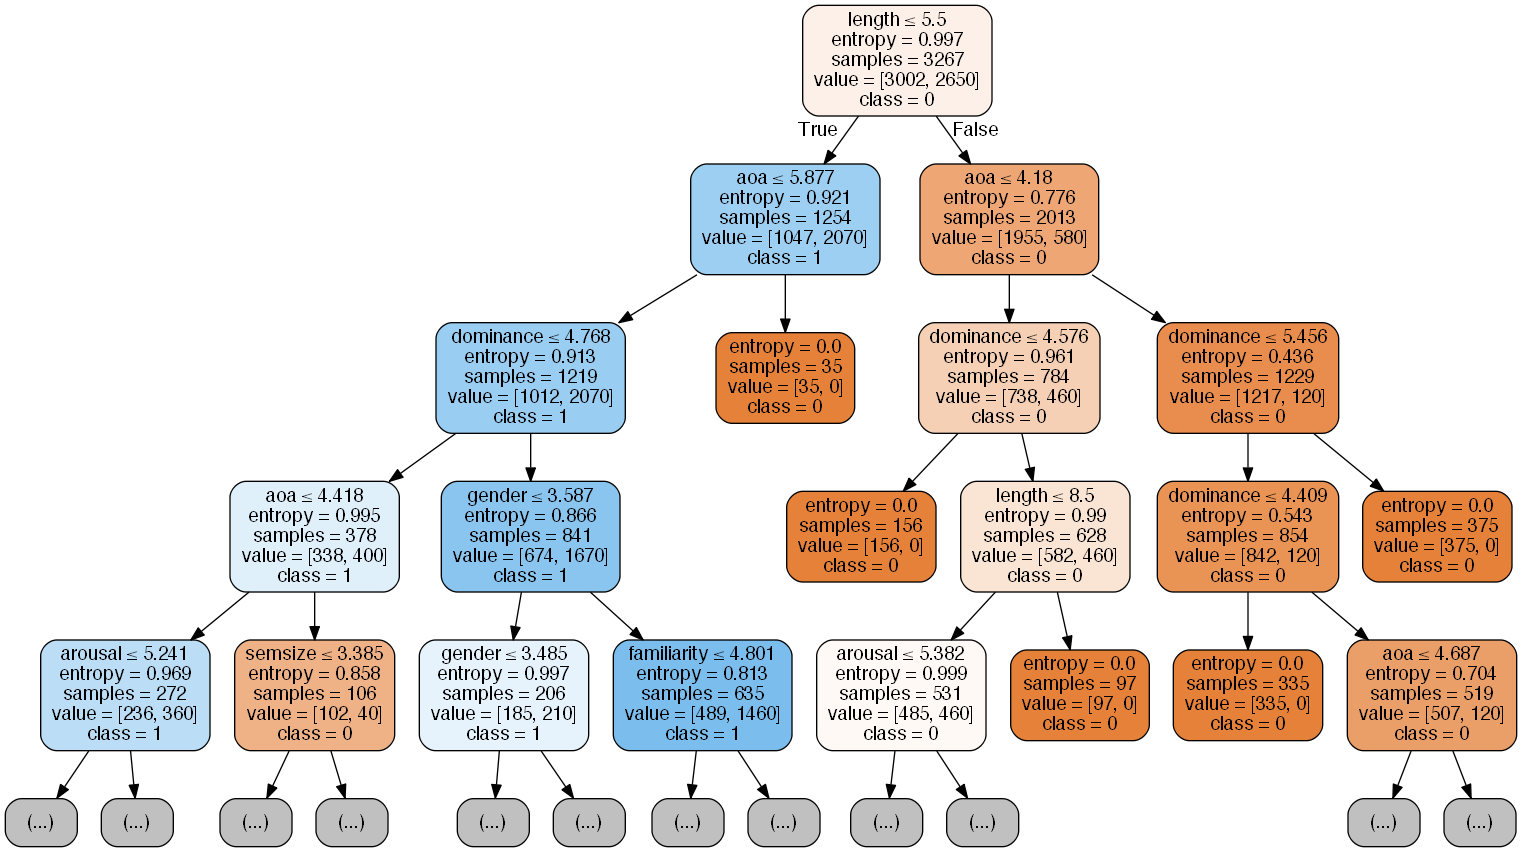

In [23]:
dot_data = tree.export_graphviz (clf, out_file=None,
                                feature_names=attributes,
                                class_names=[str(v) for v in clf.classes_],
                                filled=True, rounded=True,
                                special_characters=True,
                                max_depth=4)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [24]:
y_pred = clf.predict(X_test)

In [25]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [26]:
accuracy_DT = accuracy_score(y_test, y_pred)
print(accuracy_DT)

0.8379728765167738


In [27]:
cf = confusion_matrix(y_test, y_pred, )


In [28]:
plot_cf_train = ConfusionMatrixDisplay(cf)

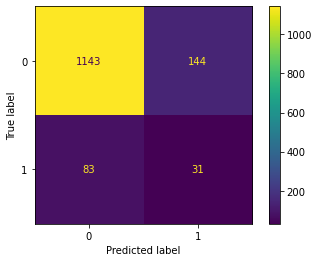

In [29]:
plot_cf_train.plot()

In [30]:
print(classification_report(y_test, y_pred) )

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      1287
           1       0.18      0.27      0.21       114

    accuracy                           0.84      1401
   macro avg       0.55      0.58      0.56      1401
weighted avg       0.87      0.84      0.85      1401



No handles with labels found to put in legend.


0.5814760288444498


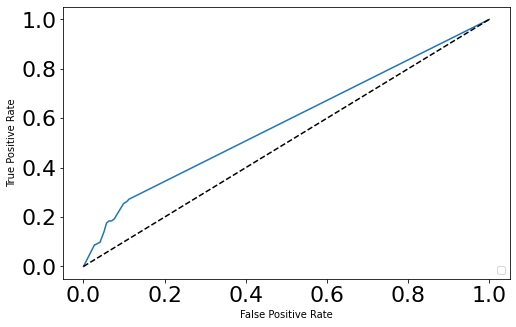

In [31]:
y_score = clf.predict_proba(X_test)
fpr, tpr, th = roc_curve(y_test, y_score[:,1])
roc_auc = auc(fpr, tpr)
print(roc_auc)

plt.figure(figsize=(8,5))

plt.plot(fpr, tpr)

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate', fontsize=10)
plt.ylabel('True Positive Rate', fontsize=10)
plt.legend(loc="lower right")
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

## SMOTE (Oversampling)

In [32]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 3002, 1: 3002})


In [33]:
param_list = {'max_depth': list(np.arange(2, 20)),
              'min_samples_split': [2, 5, 10, 20, 30, 50, 100],
              'min_samples_leaf': [1, 5, 10, 20, 30, 50, 100],
              'criterion': ["gini", "entropy"]
             }

clf = DecisionTreeClassifier()

random_search = RandomizedSearchCV(clf, param_distributions=param_list, n_iter=100, random_state=21)
random_search.fit(X_res, y_res)
report(random_search.cv_results_, n_top=5)

Model with rank: 1
Mean validation score: 0.886 (std: 0.010)
Parameters: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 17, 'criterion': 'entropy'}

Model with rank: 2
Mean validation score: 0.869 (std: 0.014)
Parameters: {'min_samples_split': 20, 'min_samples_leaf': 1, 'max_depth': 16, 'criterion': 'entropy'}

Model with rank: 3
Mean validation score: 0.869 (std: 0.011)
Parameters: {'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 14, 'criterion': 'gini'}

Model with rank: 4
Mean validation score: 0.867 (std: 0.010)
Parameters: {'min_samples_split': 20, 'min_samples_leaf': 1, 'max_depth': 13, 'criterion': 'entropy'}

Model with rank: 5
Mean validation score: 0.860 (std: 0.009)
Parameters: {'min_samples_split': 20, 'min_samples_leaf': 5, 'max_depth': 12, 'criterion': 'gini'}



In [34]:
clf = DecisionTreeClassifier(criterion='entropy',
                             max_depth= 17,
                             min_samples_split=2,
                             min_samples_leaf=1, random_state = 20)

clf.fit(X_res, y_res)

DecisionTreeClassifier(criterion='entropy', max_depth=17, random_state=20)

In [35]:
y_pred = clf.predict(X_test)

In [36]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [37]:
print(classification_report(y_test, y_pred) )

              precision    recall  f1-score   support

           0       0.94      0.84      0.89      1287
           1       0.20      0.43      0.27       114

    accuracy                           0.81      1401
   macro avg       0.57      0.64      0.58      1401
weighted avg       0.88      0.81      0.84      1401



0.6501928870349923


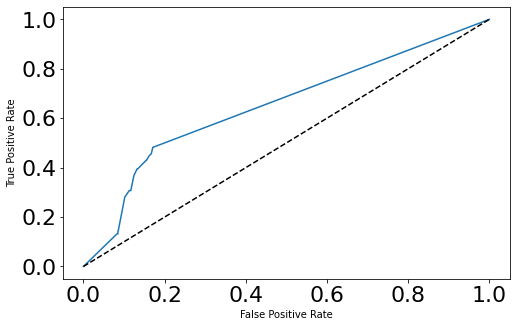

In [38]:
y_score = clf.predict_proba(X_test)
fpr, tpr, th = roc_curve(y_test, y_score[:,1])
roc_auc = auc(fpr, tpr)
print(roc_auc)

plt.figure(figsize=(8,5))

plt.plot(fpr, tpr)

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate', fontsize=10)
plt.ylabel('True Positive Rate', fontsize=10)

plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

## Random Oversampling


In [64]:
ros = RandomOverSampler(random_state=42)
X_res_oversampling, y_res_oversampling = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res_oversampling))

Resampled dataset shape Counter({0: 3002, 1: 3002})


In [65]:
param_list = {'max_depth': list(np.arange(2, 20)),
              'min_samples_split': [2, 5, 10, 20, 30, 50, 100],
              'min_samples_leaf': [1, 5, 10, 20, 30, 50, 100],
              'criterion': ["gini", "entropy"]
             }

clf = DecisionTreeClassifier()

random_search = RandomizedSearchCV(clf, param_distributions=param_list, n_iter=100, random_state=21)
random_search.fit(X_res_oversampling, y_res_oversampling)
report(random_search.cv_results_, n_top=5)

Model with rank: 1
Mean validation score: 0.931 (std: 0.006)
Parameters: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 17, 'criterion': 'entropy'}

Model with rank: 2
Mean validation score: 0.908 (std: 0.011)
Parameters: {'min_samples_split': 20, 'min_samples_leaf': 1, 'max_depth': 16, 'criterion': 'entropy'}

Model with rank: 3
Mean validation score: 0.904 (std: 0.008)
Parameters: {'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 14, 'criterion': 'gini'}

Model with rank: 4
Mean validation score: 0.887 (std: 0.009)
Parameters: {'min_samples_split': 20, 'min_samples_leaf': 1, 'max_depth': 13, 'criterion': 'entropy'}

Model with rank: 5
Mean validation score: 0.886 (std: 0.011)
Parameters: {'min_samples_split': 20, 'min_samples_leaf': 10, 'max_depth': 18, 'criterion': 'gini'}



In [66]:
clf = DecisionTreeClassifier(criterion='entropy',
                             max_depth= 17,
                             min_samples_split=2,
                             min_samples_leaf=1, random_state = 21)

clf.fit(X_res_oversampling, y_res_oversampling)

DecisionTreeClassifier(criterion='entropy', max_depth=17, random_state=21)

In [67]:
y_pred = clf.predict(X_test)

In [68]:
print(classification_report(y_test, y_pred) )

              precision    recall  f1-score   support

           0       0.94      0.88      0.91      1287
           1       0.22      0.39      0.28       114

    accuracy                           0.84      1401
   macro avg       0.58      0.63      0.59      1401
weighted avg       0.88      0.84      0.86      1401



0.6298784061941957


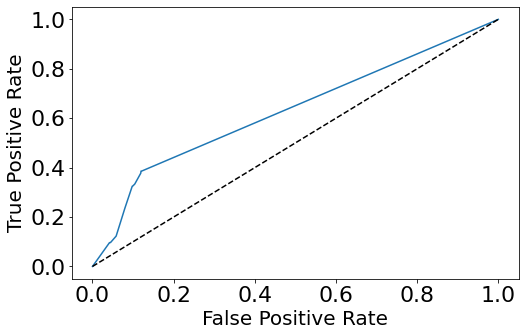

In [69]:
y_score = clf.predict_proba(X_test)
fpr, tpr, th = roc_curve(y_test, y_score[:,1])
roc_auc = auc(fpr, tpr)
print(roc_auc)

plt.figure(figsize=(8,5))

plt.plot(fpr, tpr)

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)

plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

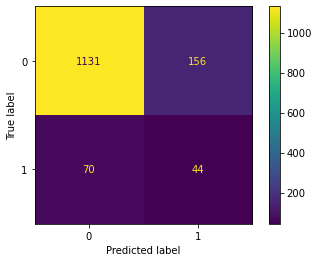

In [70]:
cf = confusion_matrix(y_test, y_pred, )
plot_cf_train = ConfusionMatrixDisplay(cf)
plot_cf_train.plot()

## KNN

In [71]:
leaf_size = list(range(1,20))
n_neighbors = list(range(1,15))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_train,y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 2
Best n_neighbors: 14


In [72]:
clf = KNeighborsClassifier(n_neighbors=24, p = 2, leaf_size = 1)
clf.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=1, n_neighbors=24)

In [73]:
y_pred = clf.predict(X_test)

In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1287
           1       0.00      0.00      0.00       114

    accuracy                           0.92      1401
   macro avg       0.46      0.50      0.48      1401
weighted avg       0.84      0.92      0.88      1401



C:\Users\Erica\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier


In [56]:
param_list = {'max_depth': list(np.arange(2, 20)),
              'min_samples_split': [2, 5, 10, 20],
              'min_samples_leaf': [1, 5, 10, 20],
              'criterion': ["gini", "entropy"]
             }

clf = RandomForestClassifier(n_estimators = 100, random_state=21)

random_search = RandomizedSearchCV(clf, param_distributions=param_list, n_iter=100, random_state=21)
random_search.fit(X_train, y_train)
report(random_search.cv_results_, n_top=5)


Model with rank: 1
Mean validation score: 0.919 (std: 0.001)
Parameters: {'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 18, 'criterion': 'gini'}

Model with rank: 2
Mean validation score: 0.919 (std: 0.002)
Parameters: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 19, 'criterion': 'gini'}

Model with rank: 3
Mean validation score: 0.919 (std: 0.001)
Parameters: {'min_samples_split': 2, 'min_samples_leaf': 5, 'max_depth': 17, 'criterion': 'gini'}

Model with rank: 3
Mean validation score: 0.919 (std: 0.001)
Parameters: {'min_samples_split': 2, 'min_samples_leaf': 5, 'max_depth': 12, 'criterion': 'gini'}

Model with rank: 3
Mean validation score: 0.919 (std: 0.001)
Parameters: {'min_samples_split': 2, 'min_samples_leaf': 5, 'max_depth': 13, 'criterion': 'gini'}

Model with rank: 3
Mean validation score: 0.919 (std: 0.001)
Parameters: {'min_samples_split': 5, 'min_samples_leaf': 5, 'max_depth': 19, 'criterion': 'gini'}



In [57]:
clf = RandomForestClassifier(n_estimators = 200, min_samples_split= 2,
                             criterion = "gini", min_samples_leaf=5, max_depth=19, random_state=21, class_weight = {1: 10, 0: 1} )
clf = clf.fit(X_train, y_train)

In [58]:
y_pred = clf.predict(X_test)

In [59]:
print(classification_report(y_test, y_pred) )

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1287
           1       0.32      0.18      0.23       114

    accuracy                           0.90      1401
   macro avg       0.62      0.57      0.59      1401
weighted avg       0.88      0.90      0.89      1401



0.7965961913330333


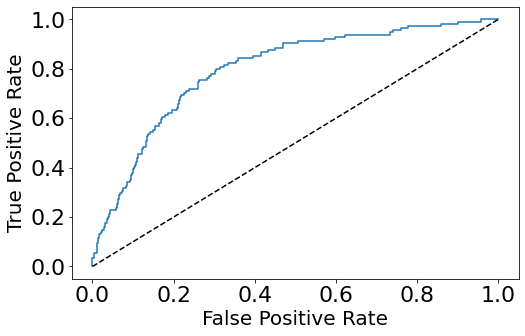

In [60]:
y_score = clf.predict_proba(X_test)
fpr, tpr, th = roc_curve(y_test, y_score[:,1])
roc_auc = auc(fpr, tpr)
print(roc_auc)

plt.figure(figsize=(8,5))

plt.plot(fpr, tpr)

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)

plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

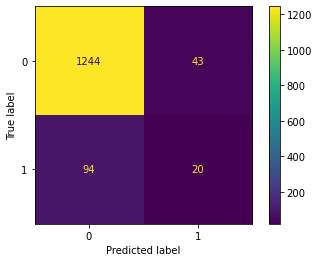

In [61]:
cf = confusion_matrix(y_test, y_pred, )
plot_cf_train = ConfusionMatrixDisplay(cf)
plot_cf_train.plot()

In [192]:
### cross-val score

In [204]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}


In [205]:
DT = DecisionTreeClassifier(criterion='entropy',
                             max_depth= 18,
                             min_samples_split=5,
                             min_samples_leaf=1, class_weight = {1: 30, 0: 1})


scores = cross_validate(DT, X, y, cv=10, scoring=scoring)

In [210]:
scores

{'fit_time': array([0.05998969, 0.07598925, 0.04299188, 0.03999376, 0.04101348,
        0.04197216, 0.04299736, 0.06097078, 0.0489924 , 0.0439918 ]),
 'score_time': array([0.00499868, 0.00599909, 0.00300026, 0.00301957, 0.00399947,
        0.00399971, 0.00399971, 0.00399995, 0.00400329, 0.00499845]),
 'test_accuracy': array([0.80299786, 0.78158458, 0.86937901, 0.82012848, 0.82012848,
        0.82226981, 0.79229122, 0.80299786, 0.79399142, 0.76609442]),
 'test_precision': array([0.21276596, 0.17346939, 0.29090909, 0.24444444, 0.22619048,
        0.26315789, 0.17582418, 0.19318182, 0.17582418, 0.14851485]),
 'test_recall': array([0.52631579, 0.44736842, 0.42105263, 0.57894737, 0.5       ,
        0.65789474, 0.42105263, 0.44736842, 0.43243243, 0.39473684]),
 'test_f1_score': array([0.3030303 , 0.25      , 0.34408602, 0.34375   , 0.31147541,
        0.37593985, 0.24806202, 0.26984127, 0.25      , 0.21582734])}

In [211]:
scores = cross_validate(clf, X, y, cv=10, scoring=scoring)

In [212]:
scores

{'fit_time': array([2.49361157, 2.26662803, 2.25146508, 2.45761633, 3.21250224,
        3.30387306, 4.15884519, 2.30966234, 2.42562437, 2.71557689]),
 'score_time': array([0.03701258, 0.04099345, 0.03599501, 0.04299212, 0.05698943,
        0.05499244, 0.03799391, 0.04499149, 0.03601432, 0.04999423]),
 'test_accuracy': array([0.90792291, 0.87794433, 0.89721627, 0.88650964, 0.89079229,
        0.88008565, 0.88436831, 0.88008565, 0.88197425, 0.89699571]),
 'test_precision': array([0.42857143, 0.22857143, 0.32142857, 0.31707317, 0.34146341,
        0.29545455, 0.3       , 0.26315789, 0.23529412, 0.34375   ]),
 'test_recall': array([0.39473684, 0.21052632, 0.23684211, 0.34210526, 0.36842105,
        0.34210526, 0.31578947, 0.26315789, 0.21621622, 0.28947368]),
 'test_f1_score': array([0.4109589 , 0.21917808, 0.27272727, 0.32911392, 0.35443038,
        0.31707317, 0.30769231, 0.26315789, 0.22535211, 0.31428571])}